In [1]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
df.drop(columns="index",inplace=True)

In [3]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [4]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist              127
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4016
LowDoc               2316
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [5]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

City unique values are ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']


City data type is object
State unique values are ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]


State data type is object
Zip unique values are [10003  2860 98027 ... 78944 17814 95812]


Zip data type is int64
Bank unique values are ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']


Bank data type is object
BankState unique values are ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA

In [6]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [7]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [8]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist             1057
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [9]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [10]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=42)
train.shape, test.shape

((640204, 19), (160051, 19))

# Target Encoding (Categorical Variables into Numerical)
``` Training set has 560178 rows and testing set has 240077 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"```

In [12]:
#target encoder
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(train, train['MIS_Status'])

train_encoded = encoder.transform(train)

# Renaming the columns
train_encoded = train_encoded.add_suffix('_trg')
train_encoded = pd.concat([train_encoded, train], axis=1)
for column in categorical_columns:
    train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)

train_encoded.drop(columns=categorical_columns, inplace=True)
train_encoded.drop(columns='MIS_Status_trg', inplace=True)
train_encoded.head()


,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
473658,0.311896,0.165712,43110,0.276163,0.223360,541921,2,0.170871,0,2,0,0.244557,0.152838,0.187475,25400.0,0.0,25400.0,12700.0,43110,541921,2,0,2,0,25400.0,0.0,25400.0,12700.0,0
778431,0.148794,0.165712,45371,0.175041,0.159471,541320,3,0.170871,0,3,0,0.187843,0.253428,0.187475,41882.0,0.0,25000.0,12500.0,45371,541320,3,0,3,0,41882.0,0.0,25000.0,12500.0,0
509938,0.152428,0.186924,92123,0.084951,0.219710,447110,1,0.170871,4,4,85304,0.244557,0.152838,0.187475,602000.0,0.0,602000.0,451500.0,92123,447110,1,4,4,85304,602000.0,0.0,602000.0,451500.0,0
651625,0.144928,0.188710,75081,0.142174,0.179305,0,15,0.186933,0,0,24957,0.244557,0.152838,0.187475,183500.0,0.0,183500.0,137625.0,75081,0,15,0,0,24957,183500.0,0.0,183500.0,137625.0,0
526142,0.134538,0.147593,96817,0.549263,0.219710,713940,10,0.170871,1,10,1,0.244557,0.152838,0.187475,5000.0,0.0,5000.0,4250.0,96817,713940,10,1,10,1,5000.0,0.0,5000.0,4250.0,1


In [13]:

test_encoded = encoder.transform(test)
test_encoded = test_encoded.add_suffix('_trg')
test_encoded = pd.concat([test_encoded, test], axis=1)
for column in categorical_columns:
    test_encoded[column + "_trg"].fillna(test_encoded[column + "_trg"].mean(), inplace=True)

test_encoded.drop(columns=categorical_columns, inplace=True)
test_encoded.drop(columns='MIS_Status_trg', inplace=True)
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,1,0.070732,0.152838,0.187475,420000.0,0.0,420000.0,315000.0,12953,0,5,0,0,1,420000.0,0.0,420000.0,315000.0,0
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,0,0.070732,0.152838,0.187475,165000.0,0.0,165000.0,140250.0,14850,235920,7,0,0,0,165000.0,0.0,165000.0,140250.0,0
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,1,0.070732,0.152838,0.187475,65000.0,0.0,65000.0,52000.0,98004,0,17,0,0,1,65000.0,0.0,65000.0,52000.0,0
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,1,0.244557,0.152838,0.187475,1125000.0,0.0,1125000.0,843750.0,33905,541940,15,15,0,1,1125000.0,0.0,1125000.0,843750.0,1
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,1,0.070732,0.152838,0.187475,240000.0,0.0,240000.0,240000.0,33172,811111,4,7,0,1,240000.0,0.0,240000.0,240000.0,0


# Feature Engineering


```Log_DisbursementGross: This feature calculates the natural logarithm of the 'DisbursementGross' column values after adding 1 (np.log1p). Log transformation is commonly used to reduce the skewness of data or make it more normally distributed. ```

``` Log_NoEmp: Similar to the first feature, it computes the natural logarithm of the 'NoEmp' column values.```

``` Log_GrAppv: Computes the natural logarithm of the 'GrAppv' column values.```

``` (4) Log_SBA_Appv: Computes the natural logarithm of the 'SBA_Appv' column values```

``` (5) Log_BalanceGross: Performs a log transformation on the 'BalanceGross' column values.```
``` (6) Disbursement_Bins: Creates categorical bins based on the 'DisbursementGross' values. It categorizes 'DisbursementGross' into three bins: 'Low', 'Medium', and 'High' based on predefined bins.```

``` (7) Loan_Efficiency: Calculates the efficiency of the loan by dividing 'DisbursementGross' by the sum of 'CreateJob', 'RetainedJob', and 1. The addition of 1 prevents division by zero.```

``` (8) Guarantee_Ratio: Computes the ratio between 'SBA_Appv' and 'GrAppv', which represents the proportion of the SBA-approved amount to the gross amount approved. ```

``` (9) Loan_Guarantee_Interaction: Multiplies 'SBA_Appv' and 'GrAppv', providing an interaction feature capturing the interaction between these two variables.```

``` (10) Disbursement_Squared: Computes the square of 'DisbursementGross', which might capture non-linear relationships in the data.```





In [14]:
# Adding Features
import numpy as np
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_NoEmp'] = np.log1p(train_encoded['NoEmp'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])

# Binning 
train_encoded['Disbursement_Bins'] = pd.cut(train_encoded['DisbursementGross'], 
                                           bins=[-np.inf, 50000, 150000, np.inf], 
                                           labels=['Low', 'Medium', 'High'])

# Loan Efficiency
train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
train_encoded['Guarantee_Ratio'] = train_encoded['SBA_Appv'] / train_encoded['GrAppv']

# Loan Guarantee Interaction
train_encoded['Loan_Guarantee_Interaction'] = train_encoded['SBA_Appv'] * train_encoded['GrAppv']

# Disbursement Squared
train_encoded['Disbursement_Squared'] = train_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
train_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()


,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
473658,10.142544,1.098612,10.142544,9.449436,Low,8466.666667,0.50,3.225800e+08,6.451600e+08
778431,10.642635,1.386294,10.126671,9.433564,Low,10470.500000,0.50,3.125000e+08,1.754102e+09
509938,13.308014,0.693147,13.308014,13.020333,High,66888.888889,0.75,2.718030e+11,3.624040e+11
651625,12.119975,2.772589,12.119975,11.832295,High,183500.000000,0.75,2.525419e+10,3.367225e+10
526142,8.517393,2.397895,8.517393,8.354910,Low,416.666667,0.85,2.125000e+07,2.500000e+07


In [15]:

# Creating log-based features for the test dataset
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_NoEmp'] = np.log1p(test_encoded['NoEmp'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])

# Binning

test_encoded['Disbursement_Bins'] = pd.cut(test_encoded['DisbursementGross'],
                                             bins=[-np.inf, 50000, 150000, np.inf],
                                             labels=['Low', 'Medium', 'High'])

# Loan Efficiency
test_encoded['Loan_Efficiency'] = test_encoded['DisbursementGross'] / (test_encoded['CreateJob'] + test_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
test_encoded['Guarantee_Ratio'] = test_encoded['SBA_Appv'] / test_encoded['GrAppv']

# Loan Guarantee Interaction
test_encoded['Loan_Guarantee_Interaction'] = test_encoded['SBA_Appv'] * test_encoded['GrAppv']

# Disbursement Squared
test_encoded['Disbursement_Squared'] = test_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
test_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()

,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,12.948012,1.791759,12.948012,12.660331,High,420000.0,0.75,1.323000e+11,1.764000e+11
662652,12.013707,2.079442,12.013707,11.851189,High,165000.0,0.85,2.314125e+10,2.722500e+10
269020,11.082158,2.890372,11.082158,10.859018,Medium,65000.0,0.80,3.380000e+09,4.225000e+09
752306,13.933294,2.772589,13.933294,13.645613,High,70312.5,0.75,9.492188e+11,1.265625e+12
675193,12.388398,1.609438,12.388398,12.388398,High,30000.0,1.00,5.760000e+10,5.760000e+10


# Scaling
StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing 

In [16]:
from sklearn.preprocessing import StandardScaler

numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
scaler = StandardScaler()
train_encoded[numerical_columns] = scaler.fit_transform(train_encoded[numerical_columns])
train_encoded.head()

test_encoded[numerical_columns] = scaler.transform(test_encoded[numerical_columns])
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Log_BalanceGross,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,1,0.070732,0.152838,0.187475,420000.0,0.0,420000.0,315000.0,12953,0,-0.086398,-0.035203,-0.045349,1,0.761437,-0.002347,0.802282,0.725015,0,1.157104,-0.048393,1.205831,1.159638,-0.004091,High,1.648470,0.234647,0.106400,0.090669
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,0,0.070732,0.152838,0.187475,165000.0,0.0,165000.0,140250.0,14850,235920,-0.059623,-0.035203,-0.045349,0,-0.125062,-0.002347,-0.097242,-0.039847,0,0.423160,0.246620,0.488425,0.593798,-0.004091,High,0.324071,0.810093,-0.180743,-0.163246
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,1,0.070732,0.152838,0.187475,65000.0,0.0,65000.0,52000.0,98004,0,0.074252,-0.035203,-0.045349,1,-0.472708,-0.002347,-0.449997,-0.426107,0,-0.308620,1.078217,-0.226864,-0.100035,-0.004091,Medium,-0.195301,0.522370,-0.232725,-0.202395
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,1,0.244557,0.152838,0.187475,1125000.0,0.0,1125000.0,843750.0,33905,541940,0.047477,0.029733,-0.045349,1,3.212347,-0.002347,3.289204,3.039296,1,1.931094,0.957432,1.962379,1.848654,-0.004091,High,-0.167710,0.234647,2.255308,1.944665
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,1,0.070732,0.152838,0.187475,240000.0,0.0,240000.0,240000.0,33172,811111,-0.099785,-0.004899,-0.045349,1,0.135673,-0.002347,0.167324,0.396748,0,0.717499,-0.235361,0.776132,0.969473,-0.004091,High,-0.377082,1.673261,-0.090099,-0.111544


In [17]:
train_encoded.columns
test_encoded.columns

Index(['City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg',
       'NAICS_trg', 'NoEmp_trg', 'NewExist_trg', 'CreateJob_trg',
       'RetainedJob_trg', 'FranchiseCode_trg', 'UrbanRural_trg',
       'RevLineCr_trg', 'LowDoc_trg', 'DisbursementGross_trg',
       'BalanceGross_trg', 'GrAppv_trg', 'SBA_Appv_trg', 'Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'MIS_Status',
       'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv',
       'Log_BalanceGross', 'Disbursement_Bins', 'Loan_Efficiency',
       'Guarantee_Ratio', 'Loan_Guarantee_Interaction',
       'Disbursement_Squared'],
      dtype='object')

In [18]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()

In [19]:
y_train = X_train['MIS_Status']
X_train.drop(columns='MIS_Status', axis=1, inplace=True)
y_test = X_test['MIS_Status']
X_test.drop(columns='MIS_Status', axis=1, inplace=True)

In [20]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [21]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8225855591034863
AUC score on Train dataset: 0.8473599291272692


In [22]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 0.8, log=True),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 700, step=10),
        #"num_leaves": trial.suggest_int("num_leaves", 2, 2**8, step=2),
        "max_depth": trial.suggest_int("max_depth", 10, 17, step=2),
        #"max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-1, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-1, 10.0, log=True),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        #"bagging_freq": 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 16
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
        valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            #categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

# Hyper Tuning Parameters in LGBM Optuna

Below are some important terminologies mentioned in the OPTUNA docs, understanding which will make our jobs easier:

    Trial: A single call of the objective function
    Study: An optimization session, which is a set of trials
    Parameter: A variable whose value is to be optimized, such as x in the above example 


``` num_leaves: This is the main parameter to control the complexity of the tree model. Theoretically, we can set num_leaves = 2^(max_depth) to obtain the same number of leaves as depth-wise tree. However, this simple conversion is not good in practice. The reason is that a leaf-wise tree is typically much deeper than a depth-wise tree for a fixed number of leaves. Unconstrained depth can induce over-fitting. Thus, when trying to tune the num_leaves, we should let it be smaller than 2^(max_depth)```

``` min_data_in_leaf: In order to keep a leaf-wise tree from over-fitting, this value is crucial. The ideal value is determined by num_leaves and the quantity of training samples.```

``` max_depth: The maximum depth of a tree. Limits the number of nodes in the tree```

``` learning_rate: Controls the step size during each boosting iteration. A smaller learning rate requires more iterations but can help improve generalization.```

``` lambda_l1: L1 regularization term on weights. Controls overfitting by penalizing large weights.```

``` lambda_l2: L2 regularization term on weights. Similar to L1 but penalizes large weights differently.```

bagging_fraction: The fraction of samples used for each boosting iteration. Helps in preventing overfitting by using subsets of the data.

bagging_freq: Frequency for bagging. Specifies how often to perform bagging.

is_unbalance: Controls whether the training data is unbalanced. Useful for imbalanced classification problems.

``` verbose: Controls the level of LightGBM's verbosity during training.```
``` objective: Specifies the learning task and the corresponding objective function.```



# Metric
The metric we have used here is AUCPR


In [23]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)



[I 2023-12-10 17:25:21,641] A new study created in memory with name: LGBM Classifier


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[252]	valid_0's auc: 0.859028
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[256]	valid_0's auc: 0.861669
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[244]	valid_0's auc: 0.861667
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[238]	valid_0's auc: 0.858122
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[263]	valid_0's auc: 0.859648


[I 2023-12-10 17:26:05,278] Trial 0 finished with value: 0.8600267399226471 and parameters: {'learning_rate': 0.13238993755297335, 'num_leaves': 700, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.16858915562508314, 'lambda_l2': 1.773650587284315, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.848891
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[27]	valid_0's auc: 0.851833
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.85095
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.849136
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:26:15,427] Trial 1 finished with value: 0.8502537125600433 and parameters: {'learning_rate': 0.7436492718856647, 'num_leaves': 520, 'max_depth': 10, 'min_data_in_leaf': 600, 'lambda_l1': 1.313723007210879, 'lambda_l2': 1.784435998219494, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.


Early stopping, best iteration is:
[42]	valid_0's auc: 0.850459
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.85502
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.85736
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.857762
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.853933
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.85476


[I 2023-12-10 17:26:35,763] Trial 2 finished with value: 0.8557669284482972 and parameters: {'learning_rate': 0.3016891434351898, 'num_leaves': 550, 'max_depth': 14, 'min_data_in_leaf': 700, 'lambda_l1': 0.11684490843813285, 'lambda_l2': 2.982441050587382, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.857133
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.859384
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.860878
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.85655
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.857918


[I 2023-12-10 17:26:53,475] Trial 3 finished with value: 0.8583724375258941 and parameters: {'learning_rate': 0.2734516356146528, 'num_leaves': 170, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 2.718636491445507, 'lambda_l2': 2.7628707703013027, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.855257
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.858153
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.85714
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.854524
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.855835


[I 2023-12-10 17:27:08,853] Trial 4 finished with value: 0.856181662864914 and parameters: {'learning_rate': 0.3735895355354363, 'num_leaves': 410, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 0.5090871825191621, 'lambda_l2': 0.531245124226821, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:27:09,637] Trial 5 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:27:10,726] Trial 6 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:27:12,027] Trial 7 pruned. Trial was pruned at iteration 7.
[I 2023-12-10 17:27:12,887] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:27:13,653] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:27:14,436] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:27:15,170] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:27:15,936] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:27:17,007] Trial 13 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:27:17,903] Trial 14 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:27:19,078] Trial 15 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:27:20,102] Trial 16 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 17:27:20,869] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:27:21,619] Trial 18 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.855475
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.856565
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.85752
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.853472
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.854518


[I 2023-12-10 17:27:36,817] Trial 19 finished with value: 0.855509731207119 and parameters: {'learning_rate': 0.41315793118346655, 'num_leaves': 430, 'max_depth': 16, 'min_data_in_leaf': 800, 'lambda_l1': 0.11105789306722862, 'lambda_l2': 4.149993200595819, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:27:37,567] Trial 20 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.856273
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.857241
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.856982
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.854656
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.85531


[I 2023-12-10 17:27:52,217] Trial 21 finished with value: 0.8560922939506106 and parameters: {'learning_rate': 0.3606751433904208, 'num_leaves': 440, 'max_depth': 14, 'min_data_in_leaf': 500, 'lambda_l1': 0.4242577206111134, 'lambda_l2': 0.6236188814917167, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:27:53,298] Trial 22 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[29]	valid_0's auc: 0.854369
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.858053
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.856802
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.853167
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:07,946] Trial 23 finished with value: 0.8553562983404829 and parameters: {'learning_rate': 0.35548283718523926, 'num_leaves': 630, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 0.3669035174335385, 'lambda_l2': 2.3545911018066503, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.


Early stopping, best iteration is:
[28]	valid_0's auc: 0.85439


[I 2023-12-10 17:28:08,696] Trial 24 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:09,764] Trial 25 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 17:28:10,563] Trial 26 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:11,663] Trial 27 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:13,263] Trial 28 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 17:28:14,173] Trial 29 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:15,564] Trial 30 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:16,899] Trial 31 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:18,063] Trial 32 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:19,979] Trial 33 pruned. Trial was pruned at iteration 23.
[I 2023-12-10 17:28:20,812] Trial 34 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.856224
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.858721
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.859245
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.855408
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.856654


[I 2023-12-10 17:28:38,084] Trial 35 finished with value: 0.8572504651278974 and parameters: {'learning_rate': 0.30505581107657376, 'num_leaves': 600, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 0.10013083446554812, 'lambda_l2': 0.5546600078233036, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:39,342] Trial 36 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.856363
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.857707
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.858883
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.855493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.854442


[I 2023-12-10 17:28:54,023] Trial 37 finished with value: 0.856577701475546 and parameters: {'learning_rate': 0.30115618160830354, 'num_leaves': 660, 'max_depth': 12, 'min_data_in_leaf': 200, 'lambda_l1': 0.14408510725111, 'lambda_l2': 0.5363533871386492, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:28:54,773] Trial 38 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:56,207] Trial 39 pruned. Trial was pruned at iteration 9.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:28:57,606] Trial 40 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.856108
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.857994
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.858098
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.855488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's auc: 0.855524


[I 2023-12-10 17:29:12,673] Trial 41 finished with value: 0.8566424258970674 and parameters: {'learning_rate': 0.31489877209609646, 'num_leaves': 550, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 0.18890883726714694, 'lambda_l2': 0.5551464222116601, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:29:15,021] Trial 42 pruned. Trial was pruned at iteration 34.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:29:17,671] Trial 43 pruned. Trial was pruned at iteration 41.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.856517
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.858748
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[57]	valid_0's auc: 0.858636
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.856003
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.856417


[I 2023-12-10 17:29:34,388] Trial 44 finished with value: 0.8572643178949694 and parameters: {'learning_rate': 0.25842766531567857, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 0.17604097785891978, 'lambda_l2': 1.0298613173801736, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:29:35,152] Trial 45 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.857431
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.858712
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.860398
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.855277
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.856885


[I 2023-12-10 17:29:55,339] Trial 46 finished with value: 0.8577406381859136 and parameters: {'learning_rate': 0.2207044919301121, 'num_leaves': 620, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.25755330059530596, 'lambda_l2': 1.103837111135766, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:29:56,749] Trial 47 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.858165
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.859705
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.860175
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.856034
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.858082


[I 2023-12-10 17:30:18,598] Trial 48 finished with value: 0.8584320772606407 and parameters: {'learning_rate': 0.2095452004911264, 'num_leaves': 670, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.28314817208521775, 'lambda_l2': 1.433930597487384, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:30:20,447] Trial 49 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:30:22,147] Trial 50 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.857849
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.858475
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.859954
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.855764
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.857167


[I 2023-12-10 17:30:41,008] Trial 51 finished with value: 0.8578416679516139 and parameters: {'learning_rate': 0.23038623934695204, 'num_leaves': 580, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.24724207410438123, 'lambda_l2': 1.03690673597857, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.857064
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.858556
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.859488
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.856191
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.856971


[I 2023-12-10 17:30:58,677] Trial 52 finished with value: 0.8576539369000242 and parameters: {'learning_rate': 0.216330340312591, 'num_leaves': 680, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.26481735906713755, 'lambda_l2': 1.6499115015776231, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.857068
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.858512
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[61]	valid_0's auc: 0.859234
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.856054
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.856734


[I 2023-12-10 17:31:18,498] Trial 53 finished with value: 0.8575202723630518 and parameters: {'learning_rate': 0.21964100928249483, 'num_leaves': 700, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.3268412725929073, 'lambda_l2': 1.7484319981568937, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.857857
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.860204
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.860278
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[68]	valid_0's auc: 0.856673
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.85845


[I 2023-12-10 17:31:39,493] Trial 54 finished with value: 0.8586923397643037 and parameters: {'learning_rate': 0.229939794828962, 'num_leaves': 570, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.25837022271094495, 'lambda_l2': 2.6921996585359778, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:31:40,785] Trial 55 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 17:31:41,680] Trial 56 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:31:42,433] Trial 57 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:31:43,646] Trial 58 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:31:44,770] Trial 59 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 17:31:45,570] Trial 60 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[54]	valid_0's auc: 0.85787
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.8589
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.860407
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[49]	valid_0's auc: 0.856594
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.857425


[I 2023-12-10 17:32:03,926] Trial 61 finished with value: 0.8582391854567282 and parameters: {'learning_rate': 0.2198862869582215, 'num_leaves': 560, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.2546565213106376, 'lambda_l2': 1.637293359042712, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.857329
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.859049
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.859986
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.856346
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.856642


[I 2023-12-10 17:32:21,001] Trial 62 finished with value: 0.8578702930181457 and parameters: {'learning_rate': 0.2452055239572739, 'num_leaves': 530, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.22427863427813713, 'lambda_l2': 1.55778096583017, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:32:24,066] Trial 63 pruned. Trial was pruned at iteration 46.
[I 2023-12-10 17:32:24,841] Trial 64 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.857684
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[67]	valid_0's auc: 0.85959
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.85985
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.857271
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.857681


[I 2023-12-10 17:32:44,296] Trial 65 finished with value: 0.858415210250409 and parameters: {'learning_rate': 0.2281533272578777, 'num_leaves': 570, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.40152968716734017, 'lambda_l2': 2.7788672204360996, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:32:45,258] Trial 66 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:32:46,051] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:32:46,853] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:32:47,637] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:32:48,507] Trial 70 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.858552
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.858114
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.86028
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.856498
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.857021


[I 2023-12-10 17:33:07,188] Trial 71 finished with value: 0.8580930682562986 and parameters: {'learning_rate': 0.2310814994093488, 'num_leaves': 520, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.24031192480026378, 'lambda_l2': 1.2718415240922005, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.858129
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.85902
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.860031
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:23,027] Trial 72 pruned. Trial was pruned at iteration 59.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:24,275] Trial 73 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:25,541] Trial 74 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 17:33:26,474] Trial 75 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:27,485] Trial 76 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:28,389] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:33:29,170] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:33:30,023] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:33:30,860] Trial 80 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:34,144] Trial 81 pruned. Trial was pruned at iteration 34.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.857532
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.858725
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.85948
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:50,880] Trial 82 pruned. Trial was pruned at iteration 58.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:33:52,309] Trial 83 pruned. Trial was pruned at iteration 6.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.85717
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.85868
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.859928
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.856799
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.857377


[I 2023-12-10 17:34:13,592] Trial 84 finished with value: 0.8579908024249354 and parameters: {'learning_rate': 0.22321724033063936, 'num_leaves': 550, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.22308339726954923, 'lambda_l2': 0.9826618592024223, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:34:14,373] Trial 85 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:17,515] Trial 86 pruned. Trial was pruned at iteration 34.
[I 2023-12-10 17:34:18,359] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:34:19,187] Trial 88 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:34:20,145] Trial 89 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:21,040] Trial 90 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:25,122] Trial 91 pruned. Trial was pruned at iteration 48.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:26,898] Trial 92 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:31,442] Trial 93 pruned. Trial was pruned at iteration 59.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:32,743] Trial 94 pruned. Trial was pruned at iteration 6.
[I 2023-12-10 17:34:33,568] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:34:34,477] Trial 96 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.857651
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.859147
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.859115
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.855746
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.856928


[I 2023-12-10 17:34:54,921] Trial 97 finished with value: 0.8577173080557025 and parameters: {'learning_rate': 0.24128628890339518, 'num_leaves': 610, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.2986261823363801, 'lambda_l2': 3.2402991033265622, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:34:55,739] Trial 98 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:34:56,585] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:34:57,470] Trial 100 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:34:59,557] Trial 101 pruned. Trial was pruned at iteration 15.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:01,444] Trial 102 pruned. Trial was pruned at iteration 12.
[I 2023-12-10 17:35:02,296] Trial 103 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:05,519] Trial 104 pruned. Trial was pruned at iteration 34.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:08,620] Trial 105 pruned. Trial was pruned at iteration 34.
[I 2023-12-10 17:35:09,442] Trial 106 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:35:10,255] Trial 107 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:35:11,070] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:35:11,849] Trial 109 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:13,069] Trial 110 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.857153
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.859023
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.85939
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.855585
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.856789


[I 2023-12-10 17:35:33,113] Trial 111 finished with value: 0.8575881799997888 and parameters: {'learning_rate': 0.24018627076187027, 'num_leaves': 620, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.28997489270314836, 'lambda_l2': 2.8657443474302977, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:35:33,899] Trial 112 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:35:34,671] Trial 113 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.857837
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.858969
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.859718
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.855319
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:52,621] Trial 114 pruned. Trial was pruned at iteration 59.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:53,808] Trial 115 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 17:35:54,702] Trial 116 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:55,477] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:35:56,289] Trial 118 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:35:57,116] Trial 119 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:35:58,100] Trial 120 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.858311
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.859551
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[56]	valid_0's auc: 0.860616
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.856483
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.858295


[I 2023-12-10 17:36:17,597] Trial 121 finished with value: 0.8586513512179579 and parameters: {'learning_rate': 0.21120290065107622, 'num_leaves': 520, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.2652789238432754, 'lambda_l2': 1.5931577517819755, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:36:18,806] Trial 122 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:36:20,938] Trial 123 pruned. Trial was pruned at iteration 18.
[I 2023-12-10 17:36:21,918] Trial 124 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:36:23,756] Trial 125 pruned. Trial was pruned at iteration 18.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.858135
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.858859
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.86086
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.85654
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.856953


[I 2023-12-10 17:36:41,629] Trial 126 finished with value: 0.8582692721611821 and parameters: {'learning_rate': 0.21431363741395956, 'num_leaves': 550, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.16215023780566265, 'lambda_l2': 1.3346542761479314, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:36:42,379] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:36:43,145] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:36:43,926] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:36:44,875] Trial 130 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:36:45,801] Trial 131 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.857982
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.859833
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.860173
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.856019
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.857202


[I 2023-12-10 17:37:05,175] Trial 132 finished with value: 0.8582419326312326 and parameters: {'learning_rate': 0.21622211493513482, 'num_leaves': 600, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.3515894238914401, 'lambda_l2': 1.4066870541085763, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:06,663] Trial 133 pruned. Trial was pruned at iteration 11.
[I 2023-12-10 17:37:07,611] Trial 134 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:09,165] Trial 135 pruned. Trial was pruned at iteration 11.
[I 2023-12-10 17:37:09,939] Trial 136 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:11,188] Trial 137 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 17:37:11,962] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:37:12,770] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:37:13,548] Trial 140 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:16,019] Trial 141 pruned. Trial was pruned at iteration 28.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:18,801] Trial 142 pruned. Trial was pruned at iteration 34.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:20,739] Trial 143 pruned. Trial was pruned at iteration 20.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:23,793] Trial 144 pruned. Trial was pruned at iteration 37.
[I 2023-12-10 17:37:24,669] Trial 145 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:27,192] Trial 146 pruned. Trial was pruned at iteration 27.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:29,867] Trial 147 pruned. Trial was pruned at iteration 31.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:30,842] Trial 148 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 17:37:31,830] Trial 149 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:32,595] Trial 150 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:37:36,811] Trial 151 pruned. Trial was pruned at iteration 59.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.857607
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.858816
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.859945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.856108
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.85659


[I 2023-12-10 17:37:56,053] Trial 152 finished with value: 0.8578132675219319 and parameters: {'learning_rate': 0.2172934088339664, 'num_leaves': 700, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.2963999652857492, 'lambda_l2': 1.926468336748035, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:37:56,845] Trial 153 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:37:57,831] Trial 154 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:00,260] Trial 155 pruned. Trial was pruned at iteration 22.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:02,270] Trial 156 pruned. Trial was pruned at iteration 18.
[I 2023-12-10 17:38:03,110] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:03,981] Trial 158 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:05,321] Trial 159 pruned. Trial was pruned at iteration 8.
[I 2023-12-10 17:38:06,132] Trial 160 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:07,880] Trial 161 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 17:38:08,662] Trial 162 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:10,112] Trial 163 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:11,229] Trial 164 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 17:38:12,031] Trial 165 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.856725
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.858271
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.859158
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.854915
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.857283


[I 2023-12-10 17:38:28,718] Trial 166 finished with value: 0.8572704676834231 and parameters: {'learning_rate': 0.23910527203278434, 'num_leaves': 640, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.15282603635993006, 'lambda_l2': 1.5099726784671146, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.
[I 2023-12-10 17:38:29,614] Trial 167 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:31,630] Trial 168 pruned. Trial was pruned at iteration 22.
[I 2023-12-10 17:38:32,452] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:33,249] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:34,097] Trial 171 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:34,890] Trial 172 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:35,839] Trial 173 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:36,966] Trial 174 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:39,550] Trial 175 pruned. Trial was pruned at iteration 31.
[I 2023-12-10 17:38:40,323] Trial 176 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:41,190] Trial 177 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:41,946] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:42,775] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:43,556] Trial 180 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:38:44,343] Trial 181 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:46,897] Trial 182 pruned. Trial was pruned at iteration 26.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:51,094] Trial 183 pruned. Trial was pruned at iteration 59.
[I 2023-12-10 17:38:52,061] Trial 184 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:53,898] Trial 185 pruned. Trial was pruned at iteration 15.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:56,146] Trial 186 pruned. Trial was pruned at iteration 22.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:38:57,534] Trial 187 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[50]	valid_0's auc: 0.858128
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.85947
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.860317
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[48]	valid_0's auc: 0.856571
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.856957


[I 2023-12-10 17:39:16,617] Trial 188 finished with value: 0.8582884438598674 and parameters: {'learning_rate': 0.22810765425630575, 'num_leaves': 560, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 0.31227773853598395, 'lambda_l2': 1.476097762039324, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8600267399226471.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:18,494] Trial 189 pruned. Trial was pruned at iteration 17.
[I 2023-12-10 17:39:19,294] Trial 190 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:20,364] Trial 191 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:22,149] Trial 192 pruned. Trial was pruned at iteration 14.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:23,302] Trial 193 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 17:39:24,107] Trial 194 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:26,601] Trial 195 pruned. Trial was pruned at iteration 27.
[I 2023-12-10 17:39:27,599] Trial 196 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:29,703] Trial 197 pruned. Trial was pruned at iteration 20.
[I 2023-12-10 17:39:30,656] Trial 198 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:39:31,450] Trial 199 pruned. Trial was pruned at iteration 0.


Best hyperparameters: {'learning_rate': 0.13238993755297335, 'num_leaves': 700, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.16858915562508314, 'lambda_l2': 1.773650587284315, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}
Best AUCPR: 0.8600267399226471


Best hyperparameters: {'learning_rate': 0.13238993755297335, 'num_leaves': 700, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.16858915562508314, 'lambda_l2': 1.773650587284315, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}
Best AUCPR: 0.8600267399226471


<Figure size 1200x600 with 0 Axes>

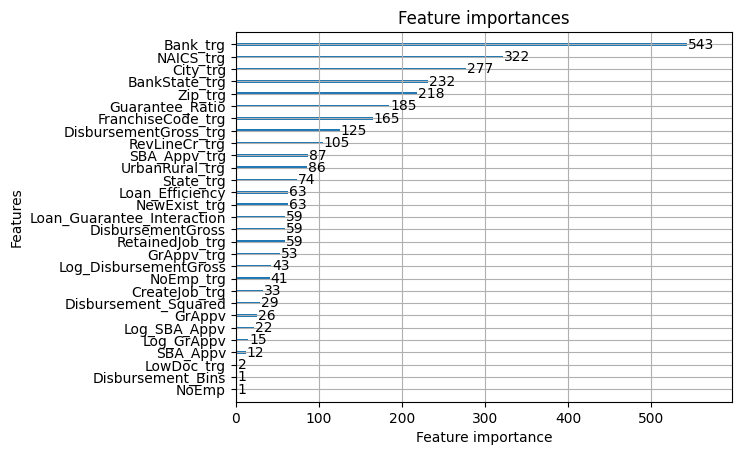

In [24]:
print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_clf, max_num_features=30)
plt.title("Feature importances")
plt.show()

# Permutation feature by Optuna

As we can see Variable Bank(encoded) is the top most feature, followed by NAICS(encoded) -> Industry type

Then we have Bank State and Zip, both encoded , and then Gaureentee ratio.


In [25]:
optuna.visualization.plot_optimization_history(study)

# Optimization Score History

As we can see the model gets us the best base score value as 0.86

In [26]:
optuna.visualization.plot_slice(study)

In [27]:
optuna.visualization.plot_param_importances(study)

# Hyperparameter Tuning and individual effect
As we can see learning_rate parameter contributes to 80% model tunining
Followed by max_depth 11% , and then lambda_l1 (Lasso) 6% and rest follow suits

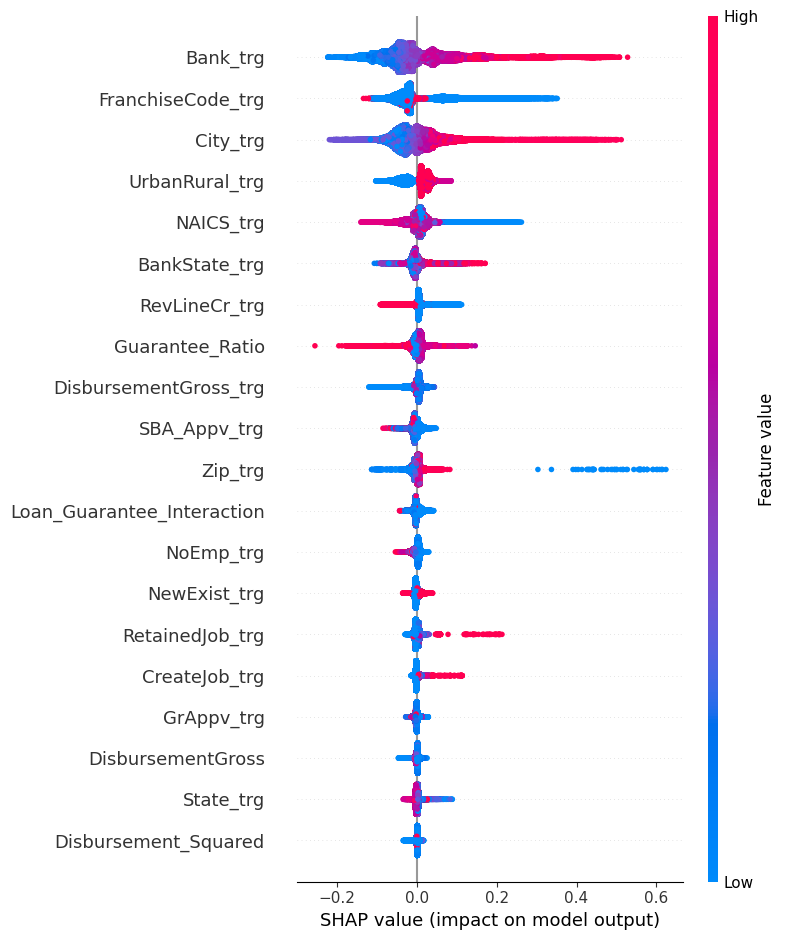

In [28]:
import shap
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (for all features)
shap.summary_plot(shap_values, X_test) 
plt.show()

# SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

``` Its a beeswarm plot, for each variable, every instance (i.e. row) of the dataset appears as its own point. The points are distributed along the x-axis according to their SHAP values. In places of high density of SHAP values, they are stacked vertically```

``` Knowing how a variable may influence the model predictions, it can be seen by how the  SHAP values are distributed. The features are ranked from top to bottom by their mean absolute SHAP values for the entire dataset. As we can see the TERM feature is the most important feature according to the SHAP values```

``` Examining the color distribution horizontally along the x-axis for each feature provides insights into general relationship between a variables raw values and its SHAP values ```

As we can see, Bank Shap value for most instances are on the positive side with color red, which means the instances of Bank variable pushes the variable in predicting if a customer will default in a higher degree.

Next, Most important variable seems to be City, with its most average instances pushing the prediction to higher side, that is helping in detecting the city to be a good factor along with other contributions from other feature in detecting whether the customer will default or not

In [29]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = study.best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [30]:
best_params


{'learning_rate': 0.13238993755297335,
 'num_leaves': 700,
 'max_depth': 10,
 'min_data_in_leaf': 900,
 'lambda_l1': 0.16858915562508314,
 'lambda_l2': 1.773650587284315,
 'bagging_fraction': 1.0,
 'bagging_freq': 5,
 'feature_fraction': 1.0,
 'is_unbalance': False}

In [31]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.86003
	Best params:
		learning_rate: 0.13238993755297335
		num_leaves: 700
		max_depth: 10
		min_data_in_leaf: 900
		lambda_l1: 0.16858915562508314
		lambda_l2: 1.773650587284315
		bagging_fraction: 1.0
		bagging_freq: 5
		feature_fraction: 1.0
		is_unbalance: False
Best model best_iteration: 250.6


In [32]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.13238993755297335, 'num_leaves': 700, 'max_depth': 10, 'min_data_in_leaf': 900, 'lambda_l1': 0.16858915562508314, 'lambda_l2': 1.773650587284315, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False, 'num_iterations': 250}


# AUCPR Score

In [33]:
print("AUCPR score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUCPR score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUCPR score on Test dataset: 0.8225855591034863
AUCPR score on Train dataset: 0.8473599291272692


In [34]:
from sklearn.metrics import f1_score

# Assuming best_lgb is the trained LightGBM model and X_test, y_test are defined

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = lgb_clf.predict(X_test)

# Set a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.7082954969946077
Best threshold: 0.3


# Confusion matrix

As we can see the data distrubution is imbalanced 

As such, when we calculate f1 and threshold, we use average = "macro"

Also, we can see TN = 117125, TP = 15180, FP = 15077, FN = 12669

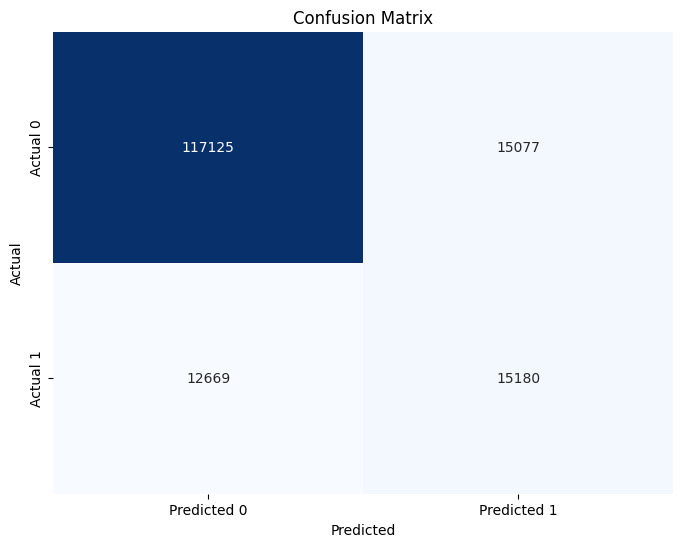

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred_proba = lgb_clf.predict(X_test)

# Use the threshold obtained earlier to predict binary labels
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [37]:
from sklearn.metrics import f1_score
def calculate_optimal_threshold(classifier, X, y):
    y_prob = classifier.predict_proba(X)[:, 1]
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_prob > threshold).astype(int)
        score = f1_score(y, y_pred, average='macro')
        f1_scores.append(score)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

In [38]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback
import warnings
import pickle
warnings.filterwarnings("ignore", category=UserWarning)

def train_model(data):

    data.drop(columns="index",inplace=True)
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    cat_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    encoder = ce.TargetEncoder(cols=cat_cols)
    encoder.fit(data, data['MIS_Status'])
    data_encoded = encoder.transform(data)
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)
    data_encoded.drop(columns='MIS_Status_trg', inplace=True)


    #Feature Engineering
    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_NoEmp'] = np.log1p(data_encoded['NoEmp'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])

    data_encoded['Disbursement_Bins'] = pd.cut(data_encoded['DisbursementGross'],
                                                bins=[-np.inf, 50000, 150000, np.inf],
                                                labels=['Low', 'Medium', 'High'])
    
    data_encoded['Loan_Efficiency'] = data_encoded['DisbursementGross'] / (data_encoded['CreateJob'] + data_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

    data_encoded['Guarantee_Ratio'] = data_encoded['SBA_Appv'] / data_encoded['GrAppv']

    data_encoded['Loan_Guarantee_Interaction'] = data_encoded['SBA_Appv'] * data_encoded['GrAppv']

    data_encoded['Disbursement_Squared'] = data_encoded['DisbursementGross'] ** 2

    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
    scaler = StandardScaler()
    data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
    for col in data_encoded.columns:
        print(col,":",data_encoded[col].dtype)

    X_train = data_encoded.copy()
    y_train = X_train['MIS_Status']
    X_train.drop(columns=['MIS_Status'], inplace=True)    
    study_model_iteractions = {}
    def objective(trial, X, y):
        param_grid = {
            "num_iterations": 10000,
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
            "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
            "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
            "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
            "is_unbalance": trial.suggest_categorical("is_unbalance", [True, False]),
            "objective": "binary",
            "metric": "auc",
            "verbose": -1
        }

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

        cv_scores = np.empty(5)
        cv_iteractions = np.empty(5)
        for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
            X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

            train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
            valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
            lgb_clf = lgb.train(params=param_grid,
                                train_set=train_data,
                                valid_sets=[valid_data],
                                #categorical_feature=categorical_columns,
                                callbacks=[LightGBMPruningCallback(trial, "auc"),
                                            lgb.early_stopping(stopping_rounds=5)]  
                                )
            preds = lgb_clf.predict(X_valid)
            cv_scores[idx] = roc_auc_score(y_valid, preds)
            cv_iteractions[idx] = lgb_clf.best_iteration
        
        study_model_iteractions[trial.number] = np.mean(cv_iteractions)

        return np.mean(cv_scores)

    study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
    func = lambda trial: objective(trial, X_train, y_train)
    study.optimize(func, n_trials=200)
    best_params = study.best_params
    print("Best Parameters:", best_params)

    best_params = study.best_params
    print("Best Parameters:", best_params)

    # Create and train the classifier with the best parameters
    best_classifier = lgb.LGBMClassifier(**best_params)
    best_classifier.fit(X_train, y_train)

    # Now pass this classifier to your function
    optimal_threshold = calculate_optimal_threshold(best_classifier, X_train, y_train)
    print("Optimal Threshold:", optimal_threshold)
    print("Best AUC:", study.best_value)
    

    artifacts_dict ={
        "best_classifier":best_classifier,
        "encoder":encoder,
        "scaler":scaler,
        "optimal_threshold":optimal_threshold,
        "numerical_columns":numerical_columns,
        "cat_cols":cat_cols,
        "columns_to_score":X_train.columns
    }

    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/Artifacts/artifacts_dict_file.pkl", "wb")
    #artifacts_dict_file = open("D:/Work/rtifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(artifacts_dict, artifacts_dict_file)
    artifacts_dict_file.close()
    
    return best_classifier

In [39]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/SBA_loans_project_2.csv')

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
train_model(X_train)

[I 2023-12-10 17:40:31,359] A new study created in memory with name: LGBM Classifier


City_trg : float64
State_trg : float64
Zip_trg : int64
Bank_trg : float64
BankState_trg : float64
NAICS_trg : int64
NoEmp_trg : int64
NewExist_trg : float64
CreateJob_trg : int64
RetainedJob_trg : int64
FranchiseCode_trg : int64
UrbanRural_trg : int64
RevLineCr_trg : float64
LowDoc_trg : float64
DisbursementGross_trg : float64
BalanceGross_trg : float64
GrAppv_trg : float64
SBA_Appv_trg : float64
Zip : int64
NAICS : int64
NoEmp : float64
CreateJob : float64
RetainedJob : float64
FranchiseCode : int64
UrbanRural : int64
DisbursementGross : float64
BalanceGross : float64
GrAppv : float64
SBA_Appv : float64
MIS_Status : int64
Log_DisbursementGross : float64
Log_NoEmp : float64
Log_GrAppv : float64
Log_SBA_Appv : float64
Log_BalanceGross : float64
Disbursement_Bins : category
Loan_Efficiency : float64
Guarantee_Ratio : float64
Loan_Guarantee_Interaction : float64
Disbursement_Squared : float64
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[2

[I 2023-12-10 17:42:07,934] Trial 0 finished with value: 0.8593593156075828 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.0007294828396849513, 'lambda_l2': 5.108521430431259e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.856037
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.857428
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.858647
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.854754
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.854709


[I 2023-12-10 17:42:27,599] Trial 1 finished with value: 0.8563152058745531 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 1000, 'lambda_l1': 0.00020767319353613123, 'lambda_l2': 3.506479946794111e-08, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 0.856251
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[118]	valid_0's auc: 0.858761
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.85866
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.855495
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.855453


[I 2023-12-10 17:42:50,717] Trial 2 finished with value: 0.8569240535312534 and parameters: {'learning_rate': 0.26, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 0.0012650869657303628, 'lambda_l2': 0.012743405139318804, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[175]	valid_0's auc: 0.858308
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[163]	valid_0's auc: 0.859376
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[156]	valid_0's auc: 0.860168
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[214]	valid_0's auc: 0.857027
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[152]	valid_0's auc: 0.857791


[I 2023-12-10 17:43:16,042] Trial 3 finished with value: 0.8585339979814254 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 145, 'max_depth': 7, 'min_data_in_leaf': 500, 'lambda_l1': 3.434452351183798e-08, 'lambda_l2': 1.2982877727223658e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.856008
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[116]	valid_0's auc: 0.858573
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[78]	valid_0's auc: 0.85838
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.854772
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[103]	valid_0's auc: 0.856718


[I 2023-12-10 17:43:35,782] Trial 4 finished with value: 0.8568901737323303 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 65, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.05999174365063189, 'lambda_l2': 0.0003925644844827173, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:43:36,607] Trial 5 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:37,740] Trial 6 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 17:43:38,605] Trial 7 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:39,428] Trial 8 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:40,262] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:41,126] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:41,889] Trial 11 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:43,230] Trial 12 pruned. Trial was pruned at iteration 12.
[I 2023-12-10 17:43:44,065] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:44,848] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:45,742] Trial 15 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:46,755] Trial 16 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:48,138] Trial 17 pruned. Trial was pruned at iteration 12.
[I 2023-12-10 17:43:49,003] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:49,908] Trial 19 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:43:50,698] Trial 20 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:51,556] Trial 21 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:52,350] Trial 22 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:43:53,172] Trial 23 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.856497
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[87]	valid_0's auc: 0.858386
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.859018
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[104]	valid_0's auc: 0.855878
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[121]	valid_0's auc: 0.858122


[I 2023-12-10 17:44:15,472] Trial 24 finished with value: 0.8575802742034476 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 5.41397438200559e-05, 'lambda_l2': 0.03642798716791687, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:44:17,138] Trial 25 pruned. Trial was pruned at iteration 20.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:44:18,170] Trial 26 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 17:44:18,951] Trial 27 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:44:19,808] Trial 28 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.858074
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.859385
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.85955
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.855792
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.856149


[I 2023-12-10 17:44:38,617] Trial 29 finished with value: 0.8577899033967459 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 120, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.00019911511110333972, 'lambda_l2': 1.5813713570672085e-07, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[90]	valid_0's auc: 0.858231
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.859585
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[108]	valid_0's auc: 0.861808
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.856392
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[97]	valid_0's auc: 0.858113


[I 2023-12-10 17:44:56,442] Trial 30 finished with value: 0.8588256917449023 and parameters: {'learning_rate': 0.26, 'num_leaves': 105, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00023986212760882902, 'lambda_l2': 6.768350003830076e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.858073
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.85945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.860599
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.854305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.858422


[I 2023-12-10 17:45:12,364] Trial 31 finished with value: 0.8581697696592523 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00025415993703682883, 'lambda_l2': 1.1109942622327962e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.858113
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.85945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.860599
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.854305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.858421


[I 2023-12-10 17:45:28,380] Trial 32 finished with value: 0.8581774392881247 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.000301563476347318, 'lambda_l2': 5.633548686680852e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.856913
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.859041
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.860962
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[84]	valid_0's auc: 0.856374
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.857359


[I 2023-12-10 17:45:43,757] Trial 33 finished with value: 0.858129744503508 and parameters: {'learning_rate': 0.26, 'num_leaves': 105, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.008282084265738301, 'lambda_l2': 3.941182372565828e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:45:44,508] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:45:45,303] Trial 35 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:45:46,149] Trial 36 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:45:46,940] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:45:47,759] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:45:48,627] Trial 39 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:45:49,429] Trial 40 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.858072
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.85945
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.860599
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.854305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.858421


[I 2023-12-10 17:46:05,411] Trial 41 finished with value: 0.8581692615557197 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00020812647692055951, 'lambda_l2': 1.1947431445708323e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:46:06,205] Trial 42 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:46:06,959] Trial 43 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.855779
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.857884
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.86074
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.856211
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.856636


[I 2023-12-10 17:46:21,323] Trial 44 finished with value: 0.8574499181751891 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 9.058964072301895e-05, 'lambda_l2': 1.962377877992129e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:46:22,136] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:46:23,025] Trial 46 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:46:23,825] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:46:24,707] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:46:25,590] Trial 49 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:46:26,494] Trial 50 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.858073
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.859449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.860599
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.854305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.858421


[I 2023-12-10 17:46:42,122] Trial 51 finished with value: 0.8581693034757668 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00023708418299524776, 'lambda_l2': 9.301666749304991e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:46:42,887] Trial 52 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.855778
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[86]	valid_0's auc: 0.858576
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[72]	valid_0's auc: 0.86074
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.856211
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.856636


[I 2023-12-10 17:46:59,525] Trial 53 finished with value: 0.8575884610451567 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 100, 'lambda_l1': 0.00021603546652211255, 'lambda_l2': 6.78717145298089e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:47:00,313] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:01,154] Trial 55 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:02,881] Trial 56 pruned. Trial was pruned at iteration 20.
[I 2023-12-10 17:47:03,756] Trial 57 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:04,669] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:05,482] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:06,309] Trial 60 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[79]	valid_0's auc: 0.858072
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[88]	valid_0's auc: 0.859449
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.860599
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.854305
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[85]	valid_0's auc: 0.858421


[I 2023-12-10 17:47:22,645] Trial 61 finished with value: 0.8581691595813377 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00026601976257152723, 'lambda_l2': 1.3738545315784982e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:47:23,428] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:24,213] Trial 63 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:25,152] Trial 64 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:28,044] Trial 65 pruned. Trial was pruned at iteration 44.
[I 2023-12-10 17:47:28,917] Trial 66 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:29,721] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:30,545] Trial 68 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:31,365] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:32,163] Trial 70 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:34,967] Trial 71 pruned. Trial was pruned at iteration 59.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:36,326] Trial 72 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 17:47:37,128] Trial 73 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:38,730] Trial 74 pruned. Trial was pruned at iteration 21.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:47:41,314] Trial 75 pruned. Trial was pruned at iteration 44.
[I 2023-12-10 17:47:42,145] Trial 76 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:42,928] Trial 77 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:47:43,804] Trial 78 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857365
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.859514
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[80]	valid_0's auc: 0.861006
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.856183
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.85772


[I 2023-12-10 17:48:00,240] Trial 79 finished with value: 0.8583579049964092 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.00035399875137996287, 'lambda_l2': 1.5649397722683178e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:48:03,358] Trial 80 pruned. Trial was pruned at iteration 65.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.859372
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.860089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.857171
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.857673


[I 2023-12-10 17:48:19,690] Trial 81 finished with value: 0.8583536413305616 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00032215957201415526, 'lambda_l2': 8.372366155639107e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.859496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[71]	valid_0's auc: 0.861451
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.854938
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:48:34,186] Trial 82 finished with value: 0.8581809124850672 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.0006777050613986626, 'lambda_l2': 3.00934489356491e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Early stopping, best iteration is:
[58]	valid_0's auc: 0.857557
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857365
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.859513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.861032
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.856183
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[69]	valid_0's auc: 0.857758


[I 2023-12-10 17:48:51,389] Trial 83 finished with value: 0.8583703276007008 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.0009200743844244359, 'lambda_l2': 3.01018638121821e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:48:53,321] Trial 84 pruned. Trial was pruned at iteration 30.
[I 2023-12-10 17:48:54,110] Trial 85 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:48:54,958] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:48:55,791] Trial 87 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:48:57,751] Trial 88 pruned. Trial was pruned at iteration 25.
[I 2023-12-10 17:48:58,733] Trial 89 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:49:00,904] Trial 90 pruned. Trial was pruned at iteration 29.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:49:03,904] Trial 91 pruned. Trial was pruned at iteration 60.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.859372
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.860089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.857171
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.857673


[I 2023-12-10 17:49:19,393] Trial 92 finished with value: 0.8583536576931486 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00034587343339359566, 'lambda_l2': 8.990795322509813e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.859372
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.860089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.857171
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.857673


[I 2023-12-10 17:49:34,522] Trial 93 finished with value: 0.8583536433548151 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00034335303819519697, 'lambda_l2': 4.43122335557561e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.859372
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.860089
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.854937
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[62]	valid_0's auc: 0.857673


[I 2023-12-10 17:49:48,623] Trial 94 finished with value: 0.8579069100746128 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.00038334558282613517, 'lambda_l2': 4.2822378076287936e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:49:49,370] Trial 95 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:49:51,790] Trial 96 pruned. Trial was pruned at iteration 48.
[I 2023-12-10 17:49:52,665] Trial 97 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:49:53,745] Trial 98 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:49:54,544] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:49:55,346] Trial 100 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.859496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[63]	valid_0's auc: 0.860804
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.854938
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:09,780] Trial 101 finished with value: 0.8580514985181871 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.0005379484960110202, 'lambda_l2': 1.803714698485151e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Early stopping, best iteration is:
[58]	valid_0's auc: 0.857557
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:12,601] Trial 102 pruned. Trial was pruned at iteration 60.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:15,190] Trial 103 pruned. Trial was pruned at iteration 51.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:17,787] Trial 104 pruned. Trial was pruned at iteration 51.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:19,647] Trial 105 pruned. Trial was pruned at iteration 28.
[I 2023-12-10 17:50:20,510] Trial 106 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:21,376] Trial 107 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:23,350] Trial 108 pruned. Trial was pruned at iteration 29.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:24,629] Trial 109 pruned. Trial was pruned at iteration 11.
[I 2023-12-10 17:50:25,486] Trial 110 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:28,057] Trial 111 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:50:28,832] Trial 112 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:50:29,635] Trial 113 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:32,344] Trial 114 pruned. Trial was pruned at iteration 60.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:35,104] Trial 115 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:50:35,878] Trial 116 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:50:36,654] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:50:37,475] Trial 118 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.857971
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[75]	valid_0's auc: 0.860334
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.860617
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[95]	valid_0's auc: 0.857411
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.857828


[I 2023-12-10 17:50:54,915] Trial 119 finished with value: 0.8588321170123605 and parameters: {'learning_rate': 0.26, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 1.0296947261146976e-05, 'lambda_l2': 1.843243281473822e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:50:57,135] Trial 120 pruned. Trial was pruned at iteration 30.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.857971
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.859496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.860617
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.856397
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:13,114] Trial 121 finished with value: 0.8582386375342198 and parameters: {'learning_rate': 0.26, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.0005542795997062075, 'lambda_l2': 1.0462346131552537e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Early stopping, best iteration is:
[44]	valid_0's auc: 0.856712


[I 2023-12-10 17:51:13,884] Trial 122 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:51:14,675] Trial 123 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:51:15,597] Trial 124 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:17,156] Trial 125 pruned. Trial was pruned at iteration 16.
[I 2023-12-10 17:51:17,944] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:51:18,905] Trial 127 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:20,156] Trial 128 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 17:51:20,979] Trial 129 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:23,563] Trial 130 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:51:24,338] Trial 131 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:27,092] Trial 132 pruned. Trial was pruned at iteration 60.
[I 2023-12-10 17:51:27,877] Trial 133 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:30,519] Trial 134 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:51:31,356] Trial 135 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.857971
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.859496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[74]	valid_0's auc: 0.860617
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.856352
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.858358


[I 2023-12-10 17:51:47,619] Trial 136 finished with value: 0.8585587032296338 and parameters: {'learning_rate': 0.26, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 300, 'lambda_l1': 0.0006764163020627052, 'lambda_l2': 4.6918977262527884e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.
[I 2023-12-10 17:51:48,398] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:51:49,263] Trial 138 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:50,058] Trial 139 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:51,737] Trial 140 pruned. Trial was pruned at iteration 21.
[I 2023-12-10 17:51:52,517] Trial 141 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:55,174] Trial 142 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:51:56,064] Trial 143 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:51:56,837] Trial 144 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:51:59,393] Trial 145 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:52:00,255] Trial 146 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:01,047] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:01,907] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:02,683] Trial 149 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:03,495] Trial 150 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:04,276] Trial 151 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:05,046] Trial 152 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:05,866] Trial 153 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:07,029] Trial 154 pruned. Trial was pruned at iteration 8.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:09,808] Trial 155 pruned. Trial was pruned at iteration 60.
[I 2023-12-10 17:52:10,599] Trial 156 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:11,330] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:12,253] Trial 158 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:15,361] Trial 159 pruned. Trial was pruned at iteration 60.
[I 2023-12-10 17:52:16,154] Trial 160 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:17,092] Trial 161 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:17,881] Trial 162 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:18,706] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:19,487] Trial 164 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:20,255] Trial 165 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:21,636] Trial 166 pruned. Trial was pruned at iteration 13.
[I 2023-12-10 17:52:22,483] Trial 167 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:24,676] Trial 168 pruned. Trial was pruned at iteration 34.
[I 2023-12-10 17:52:25,456] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:26,214] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:26,999] Trial 171 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:27,758] Trial 172 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:28,521] Trial 173 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:52:29,325] Trial 174 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:31,908] Trial 175 pruned. Trial was pruned at iteration 51.
[I 2023-12-10 17:52:32,728] Trial 176 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:52:33,595] Trial 177 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857365
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.859515
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.861033
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.856183
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.85795


[I 2023-12-10 17:52:50,064] Trial 178 finished with value: 0.8584091758723 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.0006304358828227806, 'lambda_l2': 2.306174954096987e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857365
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[60]	valid_0's auc: 0.859513
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[82]	valid_0's auc: 0.861031
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[70]	valid_0's auc: 0.856183
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[83]	valid_0's auc: 0.857953


[I 2023-12-10 17:53:06,651] Trial 179 finished with value: 0.8584092551629986 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 0.0006121444959858329, 'lambda_l2': 2.0603028341705394e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:09,549] Trial 180 pruned. Trial was pruned at iteration 49.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:12,179] Trial 181 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:14,070] Trial 182 pruned. Trial was pruned at iteration 28.
[I 2023-12-10 17:53:15,029] Trial 183 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:17,624] Trial 184 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:20,248] Trial 185 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 17:53:21,029] Trial 186 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:23,632] Trial 187 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:25,377] Trial 188 pruned. Trial was pruned at iteration 25.
[I 2023-12-10 17:53:26,163] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:53:26,905] Trial 190 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:53:27,724] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 17:53:28,497] Trial 192 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.857462
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[55]	valid_0's auc: 0.859496
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[47]	valid_0's auc: 0.860026
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.855438
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.857557


[I 2023-12-10 17:53:42,096] Trial 193 finished with value: 0.8579959604978974 and parameters: {'learning_rate': 0.26, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 200, 'lambda_l1': 0.0009660725843792929, 'lambda_l2': 3.6912285848172e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.8593593156075828.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:44,598] Trial 194 pruned. Trial was pruned at iteration 50.
[I 2023-12-10 17:53:45,379] Trial 195 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:47,785] Trial 196 pruned. Trial was pruned at iteration 50.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:50,723] Trial 197 pruned. Trial was pruned at iteration 65.
[I 2023-12-10 17:53:51,571] Trial 198 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 17:53:52,381] Trial 199 pruned. Trial was pruned at iteration 0.


Best Parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.0007294828396849513, 'lambda_l2': 5.108521430431259e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}
Best Parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.0007294828396849513, 'lambda_l2': 5.108521430431259e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}
[LightGBM] [Warning] min_data_in_leaf is set=800, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=800
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.0007294828396849513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007294828396849513
[LightGBM] [Warning] lambda_l2 is set=5.10852143043

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.8,
               is_unbalance=True, lambda_l1=0.0007294828396849513,
               lambda_l2=5.108521430431259e-06,
               learning_rate=0.060000000000000005, max_depth=13,
               min_data_in_leaf=800, num_leaves=105)

In [40]:
import shap
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
def examine_indiv_reason_codes(df_vals_and_cotribs,
                               rec_num, 
                               include_columns, 
                               contrib_columns,
                               use_matplotlib=False):
    
    shap_columns = contrib_columns.copy()
    shap_columns.remove("BiasTerm")
    ftr_columns = include_columns.copy()
    bias = df_vals_and_cotribs['BiasTerm'].iloc[rec_num]
    shap_contribs = df_vals_and_cotribs[shap_columns].iloc[rec_num,:].values
    ftr_values =    df_vals_and_cotribs[ftr_columns].iloc[rec_num,:].values
    
    shap_plot= shap.force_plot(bias, 
                           shap_contribs, 
                           ftr_values, 
                           shap_columns,
                           link="identity",
                           matplotlib=use_matplotlib)
    plt.show()

    # return shap.force_plot(bias, 
    #                     shap_contribs, 
    #                     ftr_values, 
    #                     shap_columns,
    #                     link="logit",
    #                     matplotlib=use_matplotlib)

In [41]:
from matplotlib import pyplot as plt
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore", category=Warning)

def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    artifacts_dict_file =  open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    best_classifier = artifacts_dict["best_classifier"]
    encoder = artifacts_dict["encoder"]
    scaler = artifacts_dict["scaler"]
    threshold = artifacts_dict["optimal_threshold"]
    numerical_columns = artifacts_dict["numerical_columns"]
    cat_cols = artifacts_dict["cat_cols"]
    columns_to_score = artifacts_dict["columns_to_score"]

    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)
    
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    
    data_encoded = encoder.transform(data.drop(columns=['MIS_Status']))
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)

    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_NoEmp'] = np.log1p(data_encoded['NoEmp'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])

    data_encoded['Disbursement_Bins'] = pd.cut(data_encoded['DisbursementGross'],
                                                bins=[-np.inf, 50000, 150000, np.inf],
                                                labels=['Low', 'Medium', 'High'])
    
    data_encoded['Loan_Efficiency'] = data_encoded['DisbursementGross'] / (data_encoded['CreateJob'] + data_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

    data_encoded['Guarantee_Ratio'] = data_encoded['SBA_Appv'] / data_encoded['GrAppv']

    data_encoded['Loan_Guarantee_Interaction'] = data_encoded['SBA_Appv'] * data_encoded['GrAppv']

    data_encoded['Disbursement_Squared'] = data_encoded['DisbursementGross'] ** 2

    data_encoded[numerical_columns] = scaler.transform(data_encoded[numerical_columns])

    y_prob = best_classifier.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index" : data_encoded.index,
        "label" : y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1]
    }
    #metric to report and optimize for AUC
    print("\n\nAUC score on Test dataset:", roc_auc_score(data['MIS_Status'], y_prob[:,1]))
    print("\nConfusion Matrix:\n", confusion_matrix(data['MIS_Status'], y_pred))

    # #plotting global feature importance
    # fig, ax = plt.subplots(figsize=(10, 10))
    # lgb.plot_importance(best_classifier, ax=ax, max_num_features=30)
    # plt.show()
    

    # #shap plots
    # explainer = shap.TreeExplainer(best_classifier)
    # shap_values = explainer.shap_values(data_encoded[columns_to_score])
    # shap.summary_plot(shap_values, data_encoded[columns_to_score])
    # plt.show()

    # #plotting permutation feature importance
    # result = permutation_importance(best_classifier, data_encoded[columns_to_score], data['MIS_Status'], n_repeats=10, random_state=42, n_jobs=2)
    # sorted_idx = result.importances_mean.argsort()
    # fig, ax = plt.subplots()
    # ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=data_encoded[columns_to_score].columns[sorted_idx])
    # ax.set_title("Permutation Importances (test set)")
    # fig.tight_layout()
    # plt.show()
    

    #add columns to data_encoded
    data_encoded['label'] = y_pred
    data_encoded['probability_0'] = y_prob[:,0]
    data_encoded['probability_1'] = y_prob[:,1]
    
    #residual analysis
    data_encoded['residual'] = data_encoded['label'] - data['MIS_Status']
    misclassified = data_encoded[data_encoded['residual'] != 0]
    

    #get 2 records where
    #Label `0` is correctly identified significantly high probability
    correctly_identified_0 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is correctly identified significantly high probability
    correctly_identified_1 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    #Label `0` is incorrectly identified significantly high probability
    incorrectly_identified_0 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is incorrectly identified significantly high probability
    incorrectly_identified_1 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)

    
    
    pred_contributions_orig_table = best_classifier.predict(data_encoded[columns_to_score], pred_contrib=True)
    pred_contributions_orig_table = pd.DataFrame(pred_contributions_orig_table)
    
    contrib_columns =[]
    for col in columns_to_score:
        contrib_columns.append("contrib_"+col)
    
    contrib_columns.append("BiasTerm")
    pred_contributions_orig_table.columns = contrib_columns
    print(pred_contributions_orig_table.shape)
    print(data_encoded.shape)
    include_cols = columns_to_score
    pred_contributions_orig_table.index = data_encoded.index

    #concatenate data_encoded and pred_contributions_orig_table
    test_yhat = pd.concat([data_encoded, pred_contributions_orig_table],axis=1)
    print(test_yhat)

    correctly_identified_0 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    correctly_identified_1 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    incorrectly_identified_0 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    incorrectly_identified_1 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    print(correctly_identified_0)
    examine_indiv_reason_codes(correctly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)

    
    

    return pd.DataFrame(d)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=9.408025110972025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.408025110972025
[LightGBM] [Warning] lambda_l2 is set=3.9690665922792114e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9690665922792114e-08
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


AUC score on Test dataset: 0.833374867073196

Confusion Matrix:
 [[78223 53979]
 [ 3553 24296]]
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fra

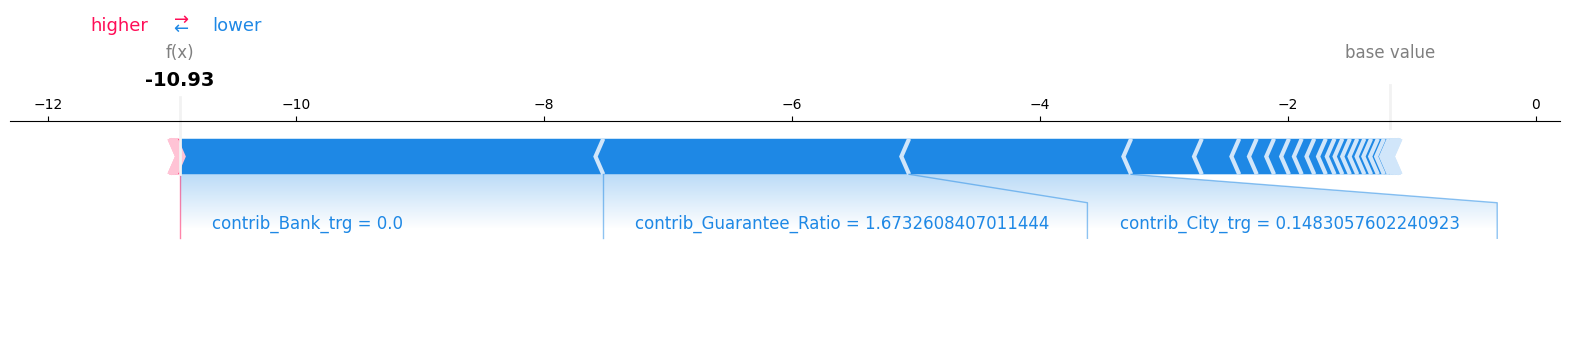

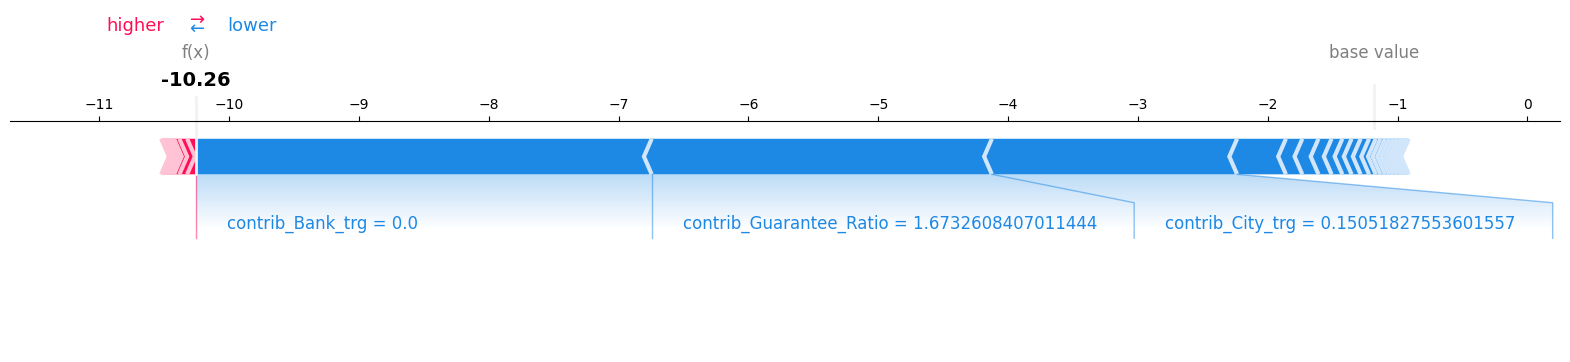

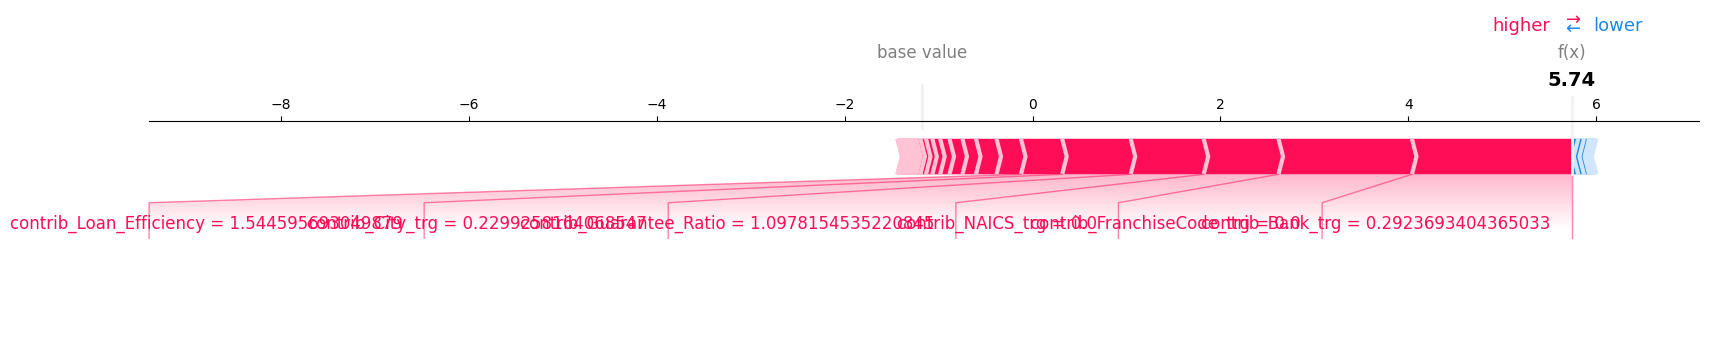

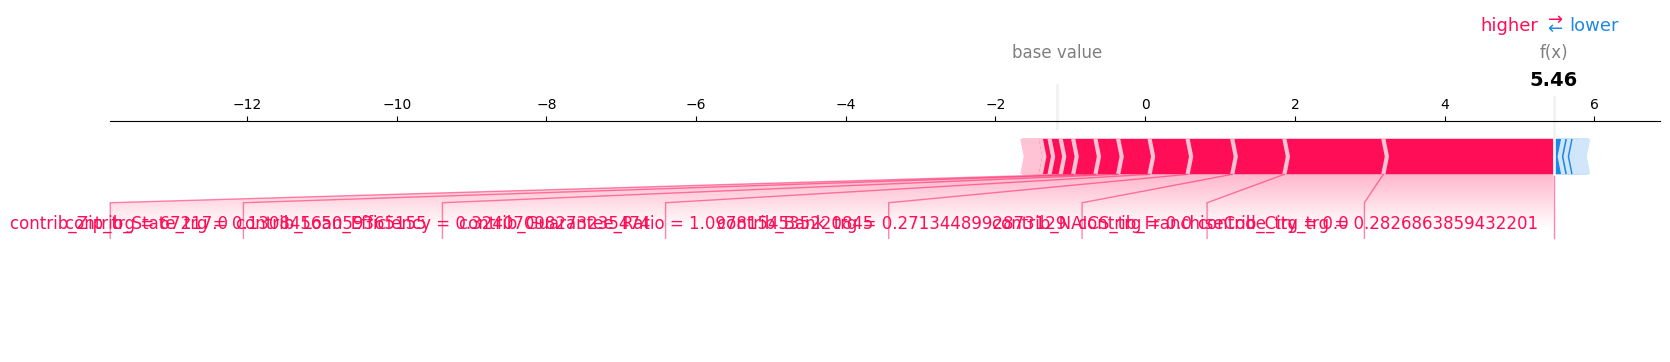

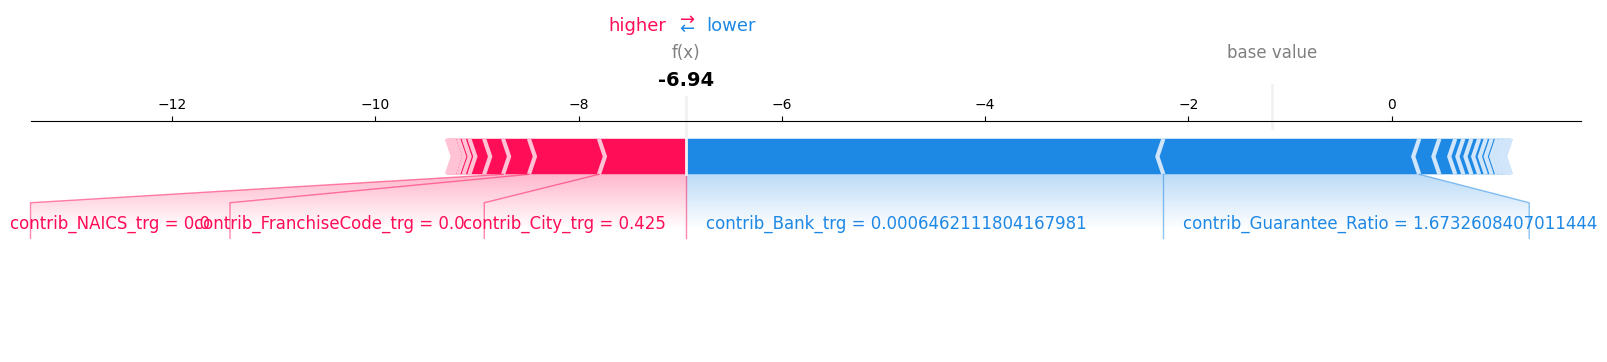

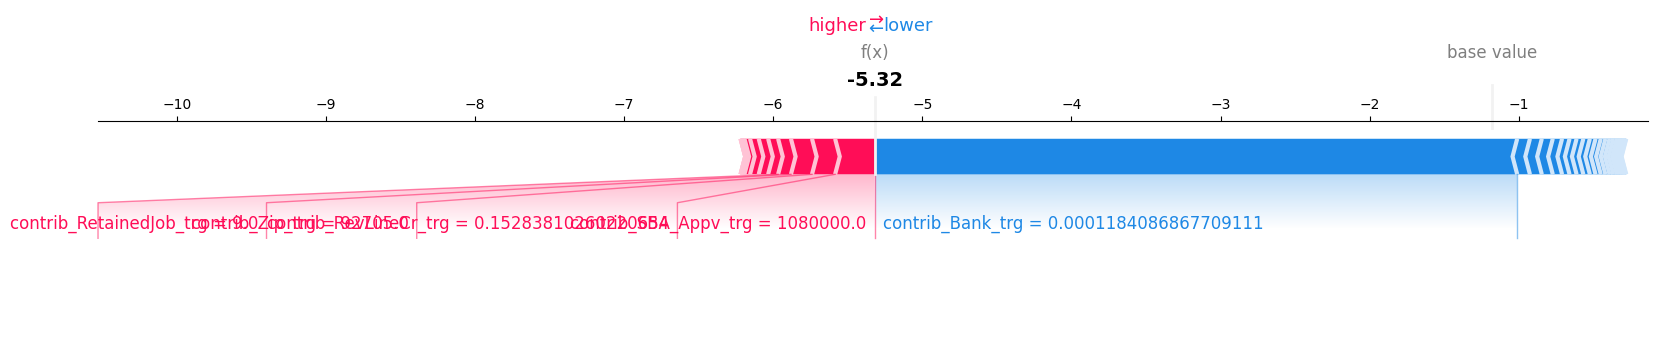

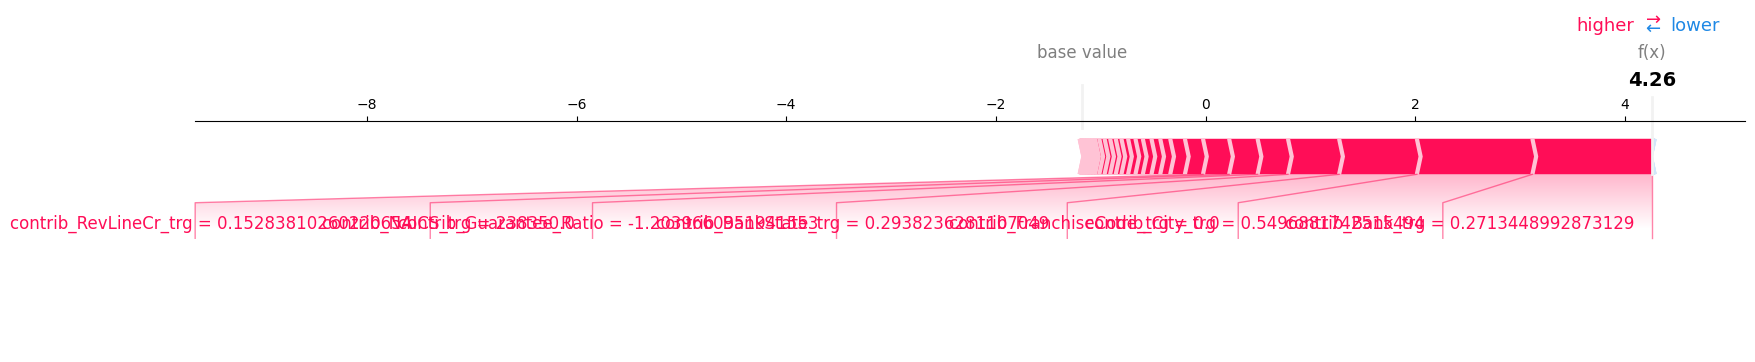

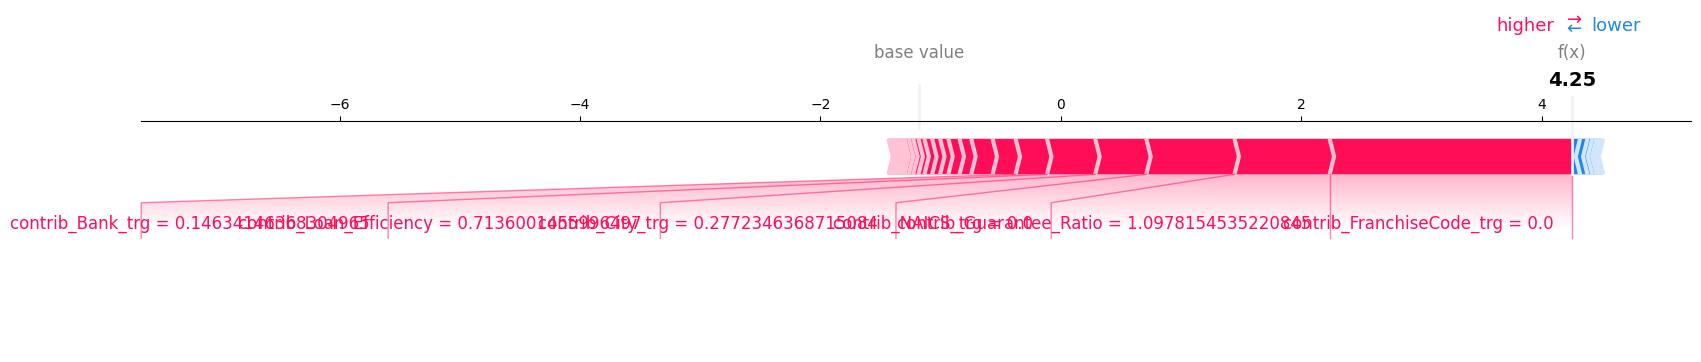

         index  label  probability_0  probability_1
0       384386      0       0.943830       0.056170
1       662652      1       0.542527       0.457473
2       269020      0       0.846271       0.153729
3       752306      0       0.745137       0.254863
4       675193      0       0.999835       0.000165
...        ...    ...            ...            ...
160046   82879      0       0.840566       0.159434
160047  649244      1       0.610946       0.389054
160048  454383      0       0.999605       0.000395
160049  679182      1       0.681184       0.318816
160050  355393      1       0.587844       0.412156

[160051 rows x 4 columns]


In [42]:
print(scoring(X_test))

# Residual Analysis

As we can see, Plot records with largest negative residuals when not defaulted, will push the model predictability to high.
Similarly,  Plot records with largest positive residuals when defaulted and model predicts low probability of default.


# Conclusion

In summary, the developed LightGBM model showcased promising performance and contributed meaningful insights into the customer defaulting on loan or not. Despite certain limitations, the project lays a foundation for future improvements and applications in Default detection

We used in SBA Dataset, with MIS_Status being our predictor variable and other explanatory variables like NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared.

We used Target encoding as an encoder for converting categorical variables to numerical variables, followed by Standard scaling to transform features to have a mean of 0 and a standard deviation of 1.

We then committed 10 feature exatraction -> Log_DisbursementGross, Log_NoEmp, Log_GrAppv, Log_SBA_Appv', Log_BalanceGross,Disbursement_Bins, Loan_Efficiency, Guarantee_Ratio', Loan_Guarantee_Interaction, and Disbursement_Square.

Then we used LightGBM Classifier: To use Optuna you first need to create an objective function. This includes a dictionary of the model’s hyperparameters you want to test, as well as the ranges of values you want to cover during testing. Optuna will do a series of runs and test different combinations of hyperparameters by fitting them to your model and then measuring the accuracy (or whatever objective you set) before finally returning the best parameters.

o run the Optuna study and identify the best hyperparameters for our LightGBMClassifier model we need to create a sampler. We’re using TPESampler, which uses the Tree-Structured Parzen Estimator algorithm. We want to maximise the accuracy of our model during tuning, so we’ll pass in the maximize argument to create_study() along with our sampler. We’ll then use optimize() to run 100 trials against our objective function.

To examine the results of our Optuna study we can print some values returned in the study variable. We can see that we ran 200 trials and that trial number 14 generated the best results, with an AUCPR score of  approx 84%. By looping over the trial.params.items() we can see what the winning hyperparameters were and use them in our final tuned model.


# Following observations on hyperparameters were made during training the model:

``` A  common strategy for achieving higher accuracy is to use many decision trees and decrease the learning rate. In other words, find the best combination of n_estimators and learning_rate in LGBM.

n_estimators controls the number of decision trees while learning_rate is the step size parameter of the gradient descent.

Ensembles like LGBM build trees in iterations, and each new tree is used to correct the “errors” of the previous trees. This approach is fast and powerful, and prone to overfitting.

That’s why gradient boosted ensembles have a learning_rate parameter that controls the learning speed. Typical values lie within 0.01 and 0.3, but it is possible to go beyond these, especially towards 0.```

``` 

LGBM also has important regularization parameters.

lambda_l1 and lambda_l2 specifies L1 or L2 regularization, like XGBoost's reg_lambda and reg_alpha. The optimal value for these parameters is harder to tune because their magnitude is not directly correlated with overfitting. However, a good search range is (0, 100) for both.

LGBM also has important regularization parameters.

lambda_l1 and lambda_l2 specifies L1 or L2 regularization, like XGBoost's reg_lambda and reg_alpha. The optimal value for these parameters is harder to tune because their magnitude is not directly correlated with overfitting. However, a good search range is (0, 100) for both.```

** Constructed Shapley Values : hows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. BANK Encoded had the highest shapley value contributions**

** Permutation Importance shows Bank encoded has the highest importance in predicting the target variable **

**We calculated the AUC score of
 0.8593593156075828, F1 score with average = macro for imbalanced dataset and obtained optimal threshold: 0.6767676767676768**

**Constructed confusion matrix**

**Created a Training function and stored the parameters in  artifacts**

**Using the SBA training data set, Splitted the dataset and trained it**

